In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:\shiu ml\Air-Quality-Prediction\Train.csv')

features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
X = data[features]
Y = data['target']
X = X.values
Y = Y.values

print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


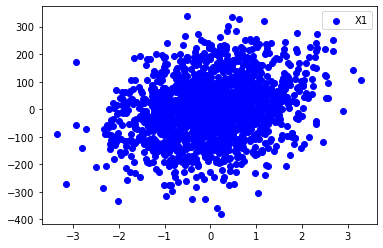

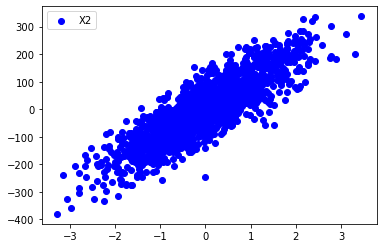

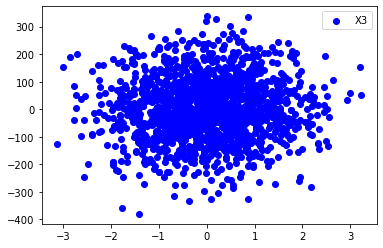

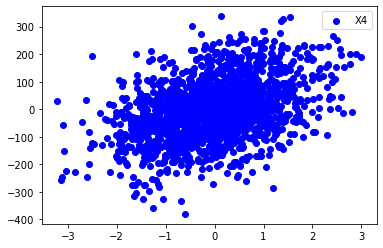

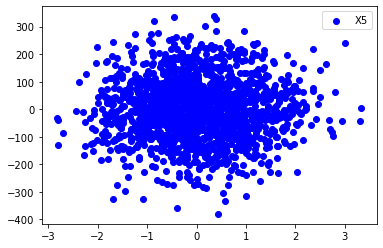

In [6]:
m = X.shape[1]
X = (X - X.mean())/X.std()
for i in range(m):
    plt.scatter(X[:, i],Y, color = 'blue',label = "X%d"%(i+1))
    plt.legend()
    plt.show()

## Multivariate Linear Regression

In [9]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3] + theta[5]*x[4]

def error(X,Y,theta):
    
    m = X.shape[0]
    er = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        er += (hx - Y[i])**2
        
    return er

def gradient(X,Y,theta):
    grad = np.zeros((6,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx - Y[i])
        for j in range(X.shape[1]):
            grad[j+1] += (hx - Y[i])*X[i,j]
    return grad
    
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.zeros((6,))
    max_iter = 300
    error_list = []
    itr = 0
    
    while(itr<=max_iter):
         
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate*grad
        itr+=1
        
    return theta, error_list
    

In [10]:
final_theta, error_list = gradientDescent(X,Y)

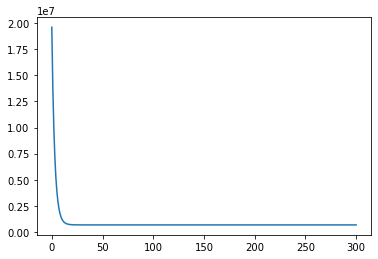

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
print(final_theta)

[ 1.49138699 29.84297081 93.16540718  8.32556432 45.01071403  2.53283406]


In [487]:
from sklearn.metrics import r2_score
m = X.shape[0]
Y_pred = np.zeros(m)
for i in range(m):
    Y_pred[i] = hypothesis(X[i], final_theta)
accuracy = r2_score(Y, Y_pred)  
print("Training accuracy:", accuracy)

Training accuracy: 0.9660939669975617


In [488]:
data = pd.read_csv('Test_given_labels.csv')
data = data.values
X_test = data[:, :5]
Y_test = data[:, 5]

In [489]:
m = X_test.shape[0]
Y_pred = np.zeros(m)
for i in range(m):
    Y_pred[i] = hypothesis(X_test[i], final_theta)
accuracy = r2_score(Y_test, Y_pred)  
print("Testing accuracy:", accuracy)

Testing accuracy: 0.967403723754328


In [490]:
Xtest = pd.read_csv('Test_hidden_labels.csv')
Xtest = Xtest.values

In [491]:
Xtest.shape

(400, 5)

In [492]:
predictions = np.zeros(Xtest.shape[0])
for i in range(Xtest.shape[0]):
    predictions[i] = hypothesis(Xtest[i], final_theta)

In [1]:
df1 = pd.DataFrame(predictions, columns = ['target'])
df1.to_csv('predictions.csv')

NameError: name 'pd' is not defined